TODO: Read data as JSON directly from https://services5.arcgis.com/ROBnTHSNjoZ2Wm1P/arcgis/rest/services/COVID_19_Statistics/FeatureServer/3/query?where=1%3D1&outFields=dtcreate,Alameda,GlobalID,OBJECTID&outSR=4326&f=json and then transform to csv

Now we have a CSV format - load it (this can be elided if we load and transform the JSON directly

TODO: Rename "I" to "Total Cases"

In [666]:
import os

#LOCAL_DATA_ROOT = "/Users/jason/development/cv19/"
CITY = os.getenv('COVID_CITY', 'alameda')
print('Parsing data from ' + CITY)
LOCAL_DATA_ROOT = "./"
CSV_FILE = "daily_data.csv"
CSV_OUTPUT_FILE = "daily_delta_data.csv"

CASES_PER_DAY_GRAPH_FILE = "daily_cases.png"

CSV_PATH = os.path.join(LOCAL_DATA_ROOT, CITY, CSV_FILE)
CSV_OUTPUT_PATH = os.path.join(LOCAL_DATA_ROOT, CITY, CSV_OUTPUT_FILE)
CASES_PER_DAY_GRAPH_PATH = os.path.join(LOCAL_DATA_ROOT, CITY, CASES_PER_DAY_GRAPH_FILE)

print('Parsing data from file ' + CSV_PATH)

%matplotlib auto
import pandas as pd

def load_covid_data(csv_path=CSV_PATH):
    return pd.read_csv(csv_path)

Parsing data from alameda
Parsing data from file ./alameda/daily_data.csv
Using matplotlib backend: MacOSX


In [667]:
covid = load_covid_data()
covid.head()

,dates,Total
0,28/02/2020,0
1,29/02/2020,NaN
2,01/03/2020,NaN
3,02/03/2020,NaN
4,03/03/2020,NaN


In [668]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 2 columns):
dates    339 non-null object
Total    330 non-null object
dtypes: object(2)
memory usage: 5.4+ KB


Clean up the data - replace NaN with 0; replace <10 with 0

In [669]:
covid["Total"].fillna(0,inplace=True)
covid["Total"].replace("<10", 0,inplace=True)

Convert I field from an object (as it originally had strings) to an int

In [670]:
covid["Total"] = covid["Total"].astype(str).astype(int)

In [671]:
covid.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 2 columns):
dates    339 non-null object
Total    339 non-null int64
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


In [672]:
covid.head()

,dates,Total
0,28/02/2020,0
1,29/02/2020,0
2,01/03/2020,0
3,02/03/2020,0
4,03/03/2020,0


In [673]:
pd.set_option('display.max_rows', None)
print(covid)

          dates  Total
0    28/02/2020      0
1    29/02/2020      0
2    01/03/2020      0
3    02/03/2020      0
4    03/03/2020      0
5    04/03/2020      0
6    05/03/2020      0
7    06/03/2020      0
8    07/03/2020      0
9    08/03/2020      0
10   09/03/2020      0
11   10/03/2020      0
12   11/03/2020      0
13   12/03/2020      0
14   13/03/2020      0
15   14/03/2020      0
16   15/03/2020      0
17   16/03/2020      0
18   17/03/2020      0
19   18/03/2020      0
20   19/03/2020      0
21   20/03/2020      0
22   21/03/2020      0
23   22/03/2020      0
24   23/03/2020      0
25   24/03/2020     10
26   25/03/2020     12
27   26/03/2020     12
28   27/03/2020     12
29   28/03/2020     12
30   29/03/2020     12
31   30/03/2020     13
32   31/03/2020     15
33   01/04/2020     17
34   02/04/2020     17
35   03/04/2020     19
36   04/04/2020     19
37   05/04/2020     19
38   06/04/2020     21
39   07/04/2020     22
40   08/04/2020     22
41   09/04/2020     22
42   10/04/

Work out the case delta between each row to generate a number of new cases per day as the second column

In [674]:
test = covid["Total"]
print(test)


0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25       10
26       12
27       12
28       12
29       12
30       12
31       13
32       15
33       17
34       17
35       19
36       19
37       19
38       21
39       22
40       22
41       22
42       22
43       23
44       23
45       24
46       25
47       26
48       27
49       28
50       28
51       28
52       28
53       28
54       31
55       32
56       32
57       32
58       32
59       33
60       33
61       34
62       34
63       35
64       36
65       36
66       36
67       36
68       36
69       36
70       37
71       37
72       37
73       37
74       37
75       39
76       40
77       40
78       42
79       42
80       42
81       42
82       42
83  

UNKNOWN: Why is diff on a specific row (or on test) not working?
The "I" column is an object, not an int - convert?

In [675]:
test.diff()

0       NaN
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25     10.0
26      2.0
27      0.0
28      0.0
29      0.0
30      0.0
31      1.0
32      2.0
33      2.0
34      0.0
35      2.0
36      0.0
37      0.0
38      2.0
39      1.0
40      0.0
41      0.0
42      0.0
43      1.0
44      0.0
45      1.0
46      1.0
47      1.0
48      1.0
49      1.0
50      0.0
51      0.0
52      0.0
53      0.0
54      3.0
55      1.0
56      0.0
57      0.0
58      0.0
59      1.0
60      0.0
61      1.0
62      0.0
63      1.0
64      1.0
65      0.0
66      0.0
67      0.0
68      0.0
69      0.0
70      1.0
71      0.0
72      0.0
73      0.0
74      0.0
75      2.0
76      1.0
77      0.0
78      2.0
79      0.0
80      0.0
81      0.0
82      0.0
83  

Convert dates into standard pandas data format

In [676]:
covid['std-date'] = pd.to_datetime(covid["dates"], format='%d/%m/%Y')
print(covid)
covid.info()

          dates  Total   std-date
0    28/02/2020      0 2020-02-28
1    29/02/2020      0 2020-02-29
2    01/03/2020      0 2020-03-01
3    02/03/2020      0 2020-03-02
4    03/03/2020      0 2020-03-03
5    04/03/2020      0 2020-03-04
6    05/03/2020      0 2020-03-05
7    06/03/2020      0 2020-03-06
8    07/03/2020      0 2020-03-07
9    08/03/2020      0 2020-03-08
10   09/03/2020      0 2020-03-09
11   10/03/2020      0 2020-03-10
12   11/03/2020      0 2020-03-11
13   12/03/2020      0 2020-03-12
14   13/03/2020      0 2020-03-13
15   14/03/2020      0 2020-03-14
16   15/03/2020      0 2020-03-15
17   16/03/2020      0 2020-03-16
18   17/03/2020      0 2020-03-17
19   18/03/2020      0 2020-03-18
20   19/03/2020      0 2020-03-19
21   20/03/2020      0 2020-03-20
22   21/03/2020      0 2020-03-21
23   22/03/2020      0 2020-03-22
24   23/03/2020      0 2020-03-23
25   24/03/2020     10 2020-03-24
26   25/03/2020     12 2020-03-25
27   26/03/2020     12 2020-03-26
28   27/03/202

Need to sort by incrementing dates

In [677]:
covid = covid.sort_values(by='std-date',ascending=True) 

In [678]:
print(covid)

          dates  Total   std-date
0    28/02/2020      0 2020-02-28
1    29/02/2020      0 2020-02-29
2    01/03/2020      0 2020-03-01
3    02/03/2020      0 2020-03-02
4    03/03/2020      0 2020-03-03
5    04/03/2020      0 2020-03-04
6    05/03/2020      0 2020-03-05
7    06/03/2020      0 2020-03-06
8    07/03/2020      0 2020-03-07
9    08/03/2020      0 2020-03-08
10   09/03/2020      0 2020-03-09
11   10/03/2020      0 2020-03-10
12   11/03/2020      0 2020-03-11
13   12/03/2020      0 2020-03-12
14   13/03/2020      0 2020-03-13
15   14/03/2020      0 2020-03-14
16   15/03/2020      0 2020-03-15
17   16/03/2020      0 2020-03-16
18   17/03/2020      0 2020-03-17
19   18/03/2020      0 2020-03-18
20   19/03/2020      0 2020-03-19
21   20/03/2020      0 2020-03-20
22   21/03/2020      0 2020-03-21
23   22/03/2020      0 2020-03-22
24   23/03/2020      0 2020-03-23
25   24/03/2020     10 2020-03-24
26   25/03/2020     12 2020-03-25
27   26/03/2020     12 2020-03-26
28   27/03/202

Work out diffs; convert NaN to the original value and convert diff column to int
TODO: Move diff column to column two

In [679]:
covid["I"] = covid["Total"].diff().fillna(covid['Total']).astype(int)

In [680]:
print(covid)

          dates  Total   std-date   I
0    28/02/2020      0 2020-02-28   0
1    29/02/2020      0 2020-02-29   0
2    01/03/2020      0 2020-03-01   0
3    02/03/2020      0 2020-03-02   0
4    03/03/2020      0 2020-03-03   0
5    04/03/2020      0 2020-03-04   0
6    05/03/2020      0 2020-03-05   0
7    06/03/2020      0 2020-03-06   0
8    07/03/2020      0 2020-03-07   0
9    08/03/2020      0 2020-03-08   0
10   09/03/2020      0 2020-03-09   0
11   10/03/2020      0 2020-03-10   0
12   11/03/2020      0 2020-03-11   0
13   12/03/2020      0 2020-03-12   0
14   13/03/2020      0 2020-03-13   0
15   14/03/2020      0 2020-03-14   0
16   15/03/2020      0 2020-03-15   0
17   16/03/2020      0 2020-03-16   0
18   17/03/2020      0 2020-03-17   0
19   18/03/2020      0 2020-03-18   0
20   19/03/2020      0 2020-03-19   0
21   20/03/2020      0 2020-03-20   0
22   21/03/2020      0 2020-03-21   0
23   22/03/2020      0 2020-03-22   0
24   23/03/2020      0 2020-03-23   0
25   24/03/2

In [681]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339 entries, 0 to 338
Data columns (total 4 columns):
dates       339 non-null object
Total       339 non-null int64
std-date    339 non-null datetime64[ns]
I           339 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 13.2+ KB


Swap cells to be in the correct organization for WHO-PAHO

In [682]:
cols = list(covid.columns)
a, b = cols.index('Total'), cols.index('I')
cols[b], cols[a] = cols[a], cols[b]
covid = covid[cols]


In [683]:
print(covid)

          dates   I   std-date  Total
0    28/02/2020   0 2020-02-28      0
1    29/02/2020   0 2020-02-29      0
2    01/03/2020   0 2020-03-01      0
3    02/03/2020   0 2020-03-02      0
4    03/03/2020   0 2020-03-03      0
5    04/03/2020   0 2020-03-04      0
6    05/03/2020   0 2020-03-05      0
7    06/03/2020   0 2020-03-06      0
8    07/03/2020   0 2020-03-07      0
9    08/03/2020   0 2020-03-08      0
10   09/03/2020   0 2020-03-09      0
11   10/03/2020   0 2020-03-10      0
12   11/03/2020   0 2020-03-11      0
13   12/03/2020   0 2020-03-12      0
14   13/03/2020   0 2020-03-13      0
15   14/03/2020   0 2020-03-14      0
16   15/03/2020   0 2020-03-15      0
17   16/03/2020   0 2020-03-16      0
18   17/03/2020   0 2020-03-17      0
19   18/03/2020   0 2020-03-18      0
20   19/03/2020   0 2020-03-19      0
21   20/03/2020   0 2020-03-20      0
22   21/03/2020   0 2020-03-21      0
23   22/03/2020   0 2020-03-22      0
24   23/03/2020   0 2020-03-23      0
25   24/03/2

We have a lot of dates with no data (at 0 total value) at the end of the dataset; drop these invalid data. 

TODO: We currently do it from a known end point, but we should look for where I goes negative (or we transition to 0) and drop all after this point

In [684]:
#covid = covid.loc[0:276]
#print(covid)

Remove the std-date column from the dataframe we write as CSV as it confused WHO-PAHO

In [685]:
csv_covid = covid.drop(['std-date'], axis=1)

In [686]:
csv_covid.to_csv(CSV_OUTPUT_PATH, header=True, index=False) 

Display covid cases over time

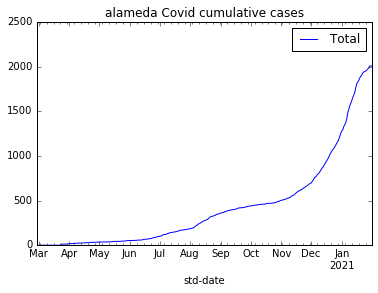

In [691]:
covid.plot(x="std-date", y="Total", title=CITY + " Covid cumulative cases")

Show log y - change in growth over time

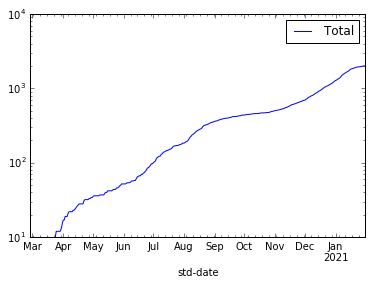

In [688]:
covid.plot(x="std-date", y="Total",logy=True)

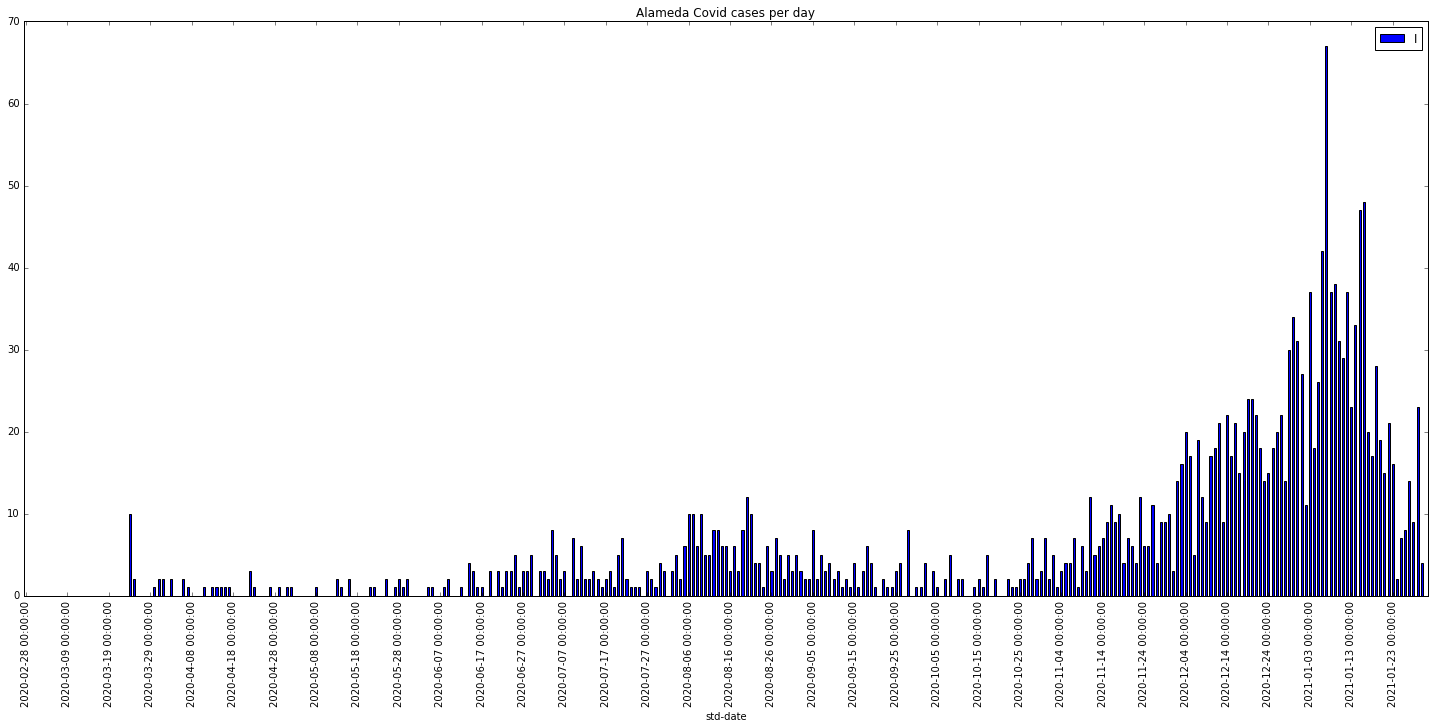

In [689]:
ax = covid.plot(x="std-date", y="I", kind="bar", figsize=(20,10), title=CITY + " Covid cases per day")

n = 10

ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])
ax.figure.tight_layout()

ax.figure.show()


In [690]:
ax.figure.savefig(CASES_PER_DAY_GRAPH_PATH)